<a href="https://colab.research.google.com/github/gilvandrocesardemedeiros/DCA_UFRN_IA/blob/main/CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AVISO PROS CODERS DE PLANTÃO

Eu tava meio de saco cheio quando fiz isso a um tempo, aí tem uns nomes de corno pra variaveis

X_train é diferente de x_train
Y_train é diferente de y_train

e o mesmo vale pro teste


In [103]:
import keras
from keras.datasets import mnist
import numpy as np

In [104]:
#load mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #everytime loading data won't be so easy :)

In [105]:
from collections import Counter
Counter(Y_test)

Counter({0: 980,
         1: 1135,
         2: 1032,
         3: 1010,
         4: 982,
         5: 892,
         6: 958,
         7: 1028,
         8: 974,
         9: 1009})

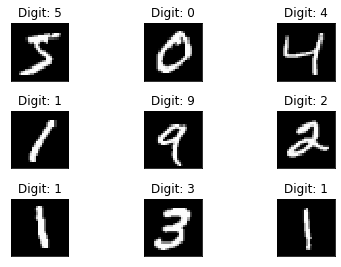

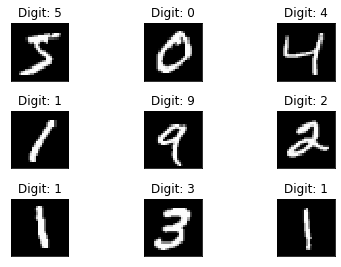

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [107]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('X_train shape:', X_train.shape)  #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28)
X_train shape: (60000, 28, 28)


In [108]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_category)
y_test = keras.utils.to_categorical(Y_test, num_category)

In [109]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
from time import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [111]:
X_train = np.reshape(X_train,(60000,28,28,1))
X_test = np.reshape(X_test,(10000,28,28,1))
print('X_train shape:', X_train.shape)
print('X_train shape:', X_test.shape)  #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)
X_train shape: (10000, 28, 28, 1)


In [112]:
x_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [113]:
lenet = Sequential()

#layer 1: C1
lenet.add(keras.layers.Conv2D( filters = 6,
                         kernel_size = (5,5),
                         strides = 1,
                         padding = "same",
                         activation = 'tanh',
                         input_shape=(28,28,1)))

#layer 2: pool

lenet.add(keras.layers.AveragePooling2D(pool_size = (2,2),
                                 strides = (2,2),
                                 padding = 'valid'))

#layer 3: C2

lenet.add(keras.layers.Conv2D( filters = 16,
                         kernel_size = (5,5),
                         strides = (1,1),
                         padding = "valid",
                         activation = 'tanh'))

#layer 4: pool

lenet.add(keras.layers.AveragePooling2D(pool_size = (2,2),
                                 strides = (2,2),
                                 padding = 'valid'))

#layer 5 : flatten

lenet.add(Flatten())

#layer 6: FC

lenet.add(keras.layers.Dense(units = 120, 
                             activation = 'tanh'))

lenet.add(keras.layers.Dense(units = 84, 
                             activation = 'tanh'))

lenet.add(keras.layers.Dense(units = 10, 
                             activation = 'softmax'))



In [114]:
lenet.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_12 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_19 (Dense)             (None, 84)               

In [115]:
lenet.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [116]:
EPOCHS = 12
BATCH_SIZE = 32

In [117]:
steps_per_epoch = x_train.shape[0]//BATCH_SIZE
validation_steps = X_valid.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
lenet.fit(x_train, y_train, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
          validation_data=(X_valid,y_valid), validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

Epoch 1/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4693 - accuracy: 0.8558 - val_loss: 0.1347 - val_accuracy: 0.9588
Epoch 2/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1157 - accuracy: 0.9643 - val_loss: 0.0884 - val_accuracy: 0.9717
Epoch 3/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0710 - accuracy: 0.9774 - val_loss: 0.0738 - val_accuracy: 0.9775
Epoch 4/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0642 - val_accuracy: 0.9805
Epoch 5/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9863 - val_loss: 0.0586 - val_accuracy: 0.9818
Epoch 6/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0663 - val_accuracy: 0.9794
Epoch 7/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0570 - val_accuracy:

In [118]:
score = lenet.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0526 - accuracy: 0.9849
Test loss: 0.0526161789894104
Test accuracy: 0.9848999977111816


In [119]:
print("Treino")
predictions = lenet.predict_classes(X_train)
print(confusion_matrix(Y_train,predictions))
print(classification_report(Y_train,predictions))

print("Teste")
predictions = lenet.predict_classes(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

Treino


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[5916    0    3    0    0    1    1    0    2    0]
 [   0 6706    7    4    4    1    2    6   11    1]
 [   0    1 5939    7    0    0    0    5    6    0]
 [   1    0   14 6095    0    3    0    2   15    1]
 [   0    3    3    0 5805    1    2    3    1   24]
 [   6    0    3   26    0 5372    5    1    6    2]
 [   6    1    2    0    5   31 5870    0    3    0]
 [   0    7    9   11    3    2    0 6194    4   35]
 [   0    2    7    4    0    4    2    1 5831    0]
 [   3    2    1    3    9    2    0    3    4 5922]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      0.99      1.00      6742
           2       0.99      1.00      0.99      5958
           3       0.99      0.99      0.99      6131
           4       1.00      0.99      1.00      5842
           5       0.99      0.99      0.99      5421
           6       1.00      0.99      0.99      5918
           7       1.00      0.99   

In [119]:
#Parte para fazer testes e etc

In [120]:
#load mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

In [121]:
Y_train = Y_train % 3
Y_test = Y_test % 3

In [122]:
Counter(Y_train)

Counter({0: 23921, 1: 18849, 2: 17230})

In [123]:
Counter(Y_test)

Counter({0: 3957, 1: 3145, 2: 2898})

In [124]:
Y_test

array([1, 2, 1, ..., 1, 2, 0], dtype=uint8)

In [125]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train shape: (60000, 28, 28)
X_train shape: (60000, 28, 28)


In [126]:
X_train = np.reshape(X_train,(60000,28,28,1))
X_test = np.reshape(X_test,(10000,28,28,1))

X_train shape: (60000, 28, 28, 1)
X_train shape: (10000, 28, 28, 1)


In [127]:
#set number of categories
num_category = 3
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_category)
y_test = keras.utils.to_categorical(Y_test, num_category)

In [128]:
x_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [130]:
lenet = Sequential()

#layer 1: C1
lenet.add(keras.layers.Conv2D( filters = 6,
                         kernel_size = (5,5),
                         strides = 1,
                         padding = "valid",
                         activation = 'tanh',
                         input_shape=(28,28,1)))

#layer 2: pool

lenet.add(keras.layers.AveragePooling2D(pool_size = (2,2),
                                 strides = (2,2),
                                 padding = 'valid'))
'''
#layer 3: C2

lenet.add(keras.layers.Conv2D( filters = 16,
                         kernel_size = (5,5),
                         strides = (1,1),
                         padding = "valid",
                         activation = 'tanh'))

#layer 4: pool

lenet.add(keras.layers.AveragePooling2D(pool_size = (2,2),
                                 strides = (2,2),
                                 padding = 'valid'))
'''
#layer 5 : flatten

lenet.add(Flatten())

#layer 6: FC

lenet.add(keras.layers.Dense(units = 120, 
                             activation = 'tanh'))

lenet.add(keras.layers.Dense(units = 84, 
                             activation = 'tanh'))

lenet.add(keras.layers.Dense(units = 3, 
                             activation = 'softmax'))



In [131]:
lenet.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 864)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               103800    
_________________________________________________________________
dense_22 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 255       
Total params: 114,375
Trainable params: 114,375
Non-trainable params: 0
________________________________________________

In [132]:
lenet.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [133]:
EPOCHS = 12
BATCH_SIZE = 32

In [134]:
steps_per_epoch = x_train.shape[0]//BATCH_SIZE
validation_steps = X_valid.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
lenet.fit(x_train, y_train, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
          validation_data=(X_valid,y_valid), validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

Epoch 1/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3555 - accuracy: 0.8595 - val_loss: 0.1103 - val_accuracy: 0.9614
Epoch 2/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0891 - accuracy: 0.9688 - val_loss: 0.0906 - val_accuracy: 0.9708
Epoch 3/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0578 - accuracy: 0.9795 - val_loss: 0.0711 - val_accuracy: 0.9759
Epoch 4/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0402 - accuracy: 0.9863 - val_loss: 0.0710 - val_accuracy: 0.9766
Epoch 5/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0296 - accuracy: 0.9899 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 6/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0737 - val_accuracy: 0.9766
Epoch 7/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0229 - accuracy: 0.9922 - val_loss: 0.0636 - val_accuracy:

In [135]:
score = lenet.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0850 - accuracy: 0.9795
Test loss: 0.08496392518281937
Test accuracy: 0.9794999957084656


In [136]:
print("Treino")
predictions = lenet.predict_classes(X_train)
print(confusion_matrix(Y_train,predictions))
print(classification_report(Y_train,predictions))

print("Teste")
predictions = lenet.predict_classes(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

Treino


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[23791    70    60]
 [   46 18785    18]
 [  171    51 17008]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23921
           1       0.99      1.00      1.00     18849
           2       1.00      0.99      0.99     17230

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

Teste
[[3898   35   24]
 [  27 3106   12]
 [  90   17 2791]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3957
           1       0.98      0.99      0.99      3145
           2       0.99      0.96      0.98      2898

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

